In [14]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LinearRegression
import sys, os
import copy
from IPython.display import clear_output

In [11]:
n = int(input())
x = []
y = []
for i in range(n):
    x_cur, y_cur = input().split()
    x.append(float(x_cur))
    y.append(float(y_cur))

In [ ]:
d = {}
y = []
y_sum = 0
for _ in range(100):
    cur_x = 10 * random.random()
    cur_y = cur_x * 3 + random.normalvariate(0,1)
    d[cur_x] = cur_y

In [ ]:
x, y = zip(*sorted([[keys, d[keys]] for keys in d.keys()], key = lambda x: x[0]))

In [ ]:
s_left = 0
s_right = sum(y)
s2_left = 0
s2_right = sum(map(lambda x: x*2, y))
n = len(x)
best_a = y[0]
best_b = s_right / n
best_c = (x[0] + x[1]) / 2
best_coast = float('inf')

In [ ]:
for i in range(n - 1):
    s_left += y[i]
    s_right -= y[i]
    s2_left += y[i] ** 2
    s2_right -= y[i] ** 2
    a = s_left / (i + 1)
    b = s_right / (n - i - 1)
    if x[i] != x[i+1]:
        left_coast = a * a * (i + 1) - 2 * a * s_left + s2_left
        right_coast = b * b * (n - i - 1)  - 2 * b * s_right + s2_right
        total_coast = left_coast + right_coast
        if total_coast < best_coast:
            best_a = a
            best_b = b
            best_c = (x[i] + x[i+1]) / 2
            best_coast = total_coast
        
    
    

In [ ]:
best_a

In [ ]:
best_b

In [ ]:
tree_array = [tree(x[i], best_a, best_b, best_c) for i in range(len(x))]

In [ ]:
plt.plot(np.array(x), tree_array)
plt.plot(np.array(x), np.array(y))

In [ ]:
def tree(x, a, b, c):
    return a if x < c else b

In [ ]:
class MeanCalculation:
    def __init__(self):
        self.count = 0
        self.mean = 0
    
    def add(self, value, weight = 1):
        self.count += weight
        self.mean += weight * (value - self.mean) / self.count
    
    def remove(self, weight = 1):
        self.add(value, -weight)


In [ ]:
class SumSquareError:
    def __init__(self):
        self.MeanCalculation = MeanCalculation()
        self.sse = 0
    
    def add(self, value, weight = 1):
        cur_dif = value - self.MeanCalculation.mean
        self.MeanCalculation.add(value, weight)
        self.sse += weight * cur_dif * (value - self.MeanCalculation.mean)
        
    def remove(self, value, weight = 1):
        self.add(value, -weight)

In [ ]:
loss = []
items.sort()
min_loss = float('inf')
summarizer = Summarize(items,y_sum)
for i in range(1,len(items)):
#     a = np.mean(np.array(items)[:,1][:i])
#     b = np.mean(np.array(items)[:,1][i:])
    a, b = summarizer.step(i)
    c = (items[i][0] + items[i-1][0])/2 
    cur_loss = sum((items[j][1] -tree(items[j][0],a, b, c) ) ** 2 for j in range(len(items)))
    loss.append(cur_loss)
    if cur_loss < min_loss:
        min_loss = cur_loss
        best_a = a
        best_b = b
        best_c = c

In [ ]:
best_a

In [ ]:
best_a

In [ ]:
best_b

In [ ]:
best_c

In [ ]:
tree_array = [tree(items[i][0], best_a, best_b, best_c) for i in range(len(items))]

In [ ]:
plt.plot(np.array(items)[:,0], tree_array)
plt.plot(np.array(items)[:,0], np.array(items)[:,1])

In [ ]:
class Summarize:
    def __init__(self, items, y_sum):
        self.left_sum = 0
        self.right_sum = y_sum
        self.items = items
    def step(self, i):
        self.left_sum += items[i-1][1]
        self.right_sum -= items[i-1][1]
        return self.left_sum / i, self.right_sum / (len(items) - i)

In [ ]:
df = pd.read_csv('data.csv', names = ['x', 'y'])

In [ ]:
df['sin2x'] = df['x'].apply(lambda x: (np.sin(x))**2)
df['sinx*lnx'] = df['x'].apply(lambda x: np.sin(x) * np.log(x))
df['ln2x'] = df['x'].apply(lambda x: np.log(x)**2)
df['x**2'] = df['x'].apply(lambda x: x**2)

In [ ]:
logit = LinearRegression()

In [ ]:
logit.fit(df[df.columns.drop(['y', 'x'])], df['y'])

In [ ]:
logit.predict(df.iloc[:3][df.columns.drop(['y', 'x'])])   

In [ ]:
w1, w2, w3, w4 = logit.coef_

In [ ]:
df[df.columns.drop(['y', 'x'])]

In [ ]:
a = np.sqrt(w1)
b = np.sqrt(w3)
c = w4

In [ ]:
a, b, c

In [ ]:
with open('restaurants_train.txt', 'r') as file:
    s = file.readline()

In [ ]:
restarants = []
with open('restaurants_train.txt', 'r') as file:
    n = file.readline()
    for line in file:
        restarants.append(line.split())

In [ ]:
restarants = pd.DataFrame(restarants, columns = ['y', 'r1', 'r2', 'd1', 'd2'])

In [ ]:
def score (rd):
    r = float(rd[0])
    d = float(rd[1])
    if r > 0:
        return np.exp(r/2.9)/10 + (1/np.log(d*450 + 1.1))
    return  1 / (np.log(d*450 + 1.1))

In [ ]:
restarants['score1'] = restarants[['r1', 'd1']].apply(score, axis = 1)
restarants['score2'] = restarants[['r2', 'd2']].apply(score, axis = 1)

In [ ]:
max(restarants['score2'])

In [ ]:
def m (df):
    negative1 = df[(df['y'] == str(1))]# & (df['score1'] > df['score2'])]
    negative2 = df[(df['y'] == str(0))]#& (df['score1'] < df['score2'])]
    s1 = sum(np.log(1 + np.exp(negative1['score1'] - negative1['score2'])))
    s2 = sum(np.log(1 + np.exp(negative2['score2'] - negative2['score1'])))
    return (s1 + s2) / (negative1.shape[0] + negative2.shape[0])

In [ ]:
m(restarants)

In [ ]:
def optimization(df):
    def score (rd):
        r = float(rd[0])
        d = float(rd[1])
        if r > 0:
                return np.exp(r/a)/k + (1/np.log(d*b + c))
        return  j / (np.log(d*b + f))
    a = 5 * random.random()
    b = random.randint(1, 1000)
    c = 2 * random.random()
    f = 2 * random.random()
    j = 5 * random.random()
#     k1, k2, k3 = random.random(), random.random(), random.random()
#     k4, k5, k6 = random.random(), random.random(), random.random()
#     k1 = int(k1>0.5)
#     k2 = int(k2>0.5)
#     k3 = int(k3>0.5)
#     k4 = int(k4>0.5)
#     k5 = int(k5>0.5)
#     k6 = int(k6>0.5)
#     print(a, b, c, e, f)
    df['score1'] = df[['r1', 'd1']].apply(score, axis = 1)
    df['score2'] = df[['r2', 'd2']].apply(score, axis = 1)
    metrics = m(df)
#     print(j, metrics)
    log.append([metrics,a, b, c, f,j])
#     return m(df), a, b, c, e, k1, k2, k3

In [ ]:
log = []
for _ in range(10000):
    log.append([optimization(restarants)])

In [ ]:
min_m = 1
for i in range(len(log)):
    if log[i][0]:
        if log[i][0] < min_m:
            min_i = i
            min_m = log[i][0]

In [ ]:
min_m

In [ ]:
a = ['8', 'вк', 'рефераты', 'вк', 'ок', 'одноклассники', 'яндекс', 'вконтакте', 'ок']

In [ ]:
m = 100
b = bytearray(m)
for i in a:
    b[hash(i) % m] = 1

In [ ]:
b.count(1)

In [ ]:
len(set(a))

In [ ]:
round(0.000000000004, 20)

# Контекст

## Детектор свежести

In [ ]:
from sklearn.metrics import f1_score
import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from scipy.sparse import vstack, hstack
import scipy
from sklearn.ensemble import RandomForestClassifier
from collections import defaultdict, Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline, TransformerMixin, FeatureUnion
from sklearn.base import BaseEstimator

In [ ]:
train = pd.read_csv('c_train.tsv', sep = '\t')
test = pd.read_csv('c_test.tsv', sep = '\t')

In [ ]:
def add_date_columns(df):
    df['data'] = df['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x))
    df['hour'] = df['data'].apply(lambda x: x.hour)
    df['second'] = df['data'].apply(lambda x: x.second)
    df['minutes'] = df['data'].apply(lambda x: x.minute)
    df['day'] = df['data'].apply(lambda x: x.day)
    return df

In [ ]:
train = add_date_columns(train)
test = add_date_columns(test)

In [ ]:
train['minutes'].dtype

In [ ]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns):
        self.columns = columns
    
    def fit(self, x, y = None):
        return self
    
    def transform(self, x):
        return x[self.columns]

In [ ]:
pipeline_tfidf = Pipeline([
    ('features',
     FeatureUnion([
         ('tfidf', Pipeline([
             ('selection', ColumnSelector('query')),
             ('tfidf', TfidfVectorizer())
             ])
          ),
         ('categorial', ColumnSelector(['hour', 'second', 'minutes', 'day'] +
                                      list(filter(lambda x: x[:8] == 'requests', train.columns))
                                      )
            )
     ])
    ),
    ('clf', RandomForestClassifier(n_estimators=100, class_weight='balanced'))
])

In [ ]:
pipeline_tfidf.fit(train[train['day'] <= 28], train[train['day'] <= 28]['fresh_click'])

In [ ]:
f1_score(train[train['day'] == 29]['fresh_click'], pipeline_tfidf.predict(train[train['day'] == 29]))

In [ ]:
predict_test =  pipeline_tfidf.predict(test)

In [ ]:
np.savetxt('out.txt', predict_test, '%d')

## Отбор признаков

In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [ ]:
data = []
with open ('d_train.txt', 'r') as file:
    for line in file:
        data.append(map(float, line.split()))

In [ ]:
df = pd.DataFrame(data, columns = ['index', 'target', 'num'] + list(range(500))).drop(['index', 'num'], axis = 1)
X = df.drop(['target'], axis = 1)
Y = df['target']

In [ ]:
cv = KFold(n_splits = 10, random_state = 42, shuffle = True, )

In [ ]:
def get_mean_RMSE(features):
    RMSE = []
    for test, train in cv.split(X):
        catboost = CatBoostRegressor(iterations=200, learning_rate=0.1, verbose  = 0, random_state=42)
        catboost.fit(X[features].loc[train], Y.loc[train])
        predicts = catboost.predict(X[features].loc[test])
        RMSE.append(mean_squared_error(Y.loc[test], predicts))
    return np.mean(RMSE)


In [ ]:
catboost = CatBoostRegressor(iterations=200, learning_rate=0.1, verbose  = 0, random_state=42)

In [ ]:
catboost.fit(X,Y)

In [ ]:
features = pd.DataFrame(catboost.feature_importances_)

In [ ]:
ax = features[0].sort_values(ascending=False).head(50).plot(kind = 'bar', figsize = (15, 5))

In [ ]:
get_mean_RMSE(np.argsort(catboost.feature_importances_)[::-1][:10])

In [ ]:
print(*np.argsort(catboost.feature_importances_)[::-1][:10])

## Обобщённый AUC

In [ ]:
import random
from bisect import bisect_left, bisect_right

In [ ]:
def generate_input(n):
    input_array = []
    for i in range(n):
        input_array.append([str(random.randint(0, 100)), str(random.randint(0, 100))])
    with open ('input_f.txt', 'w') as file:
        file.write(str(n) + '\n')
        for i in input_array:
            file.write(' '.join(i) + '\n')

In [ ]:
generate_input(10000)

In [ ]:
data = []
for _ in range(int(input())):
    data.append(list(map(float, input().split())))

In [ ]:
%%time
with open ('input_f.txt', 'r') as file:
    n = file.readline()
    t, y = zip(*sorted(tuple(map(float, line.split())) for line in file))
y_sorted = sorted(y)

In [ ]:
n = int(n)

In [ ]:
%%time
i = n - 1
t_sum = 0
y_sum = 0
while i > 0:
    j = i
    while j >= 0 and  t[i] == t[j]:
        l = bisect_left(y_sorted, y[j])
        y_sorted.pop(l)
        j -= 1
    for k in range(j+1, i+1):
        l = bisect_left(y_sorted, y[k])
        r = bisect_right(y_sorted, y[k])
        y_sum += l + (r - l) / 2
        t_sum += j + 1
    i = j
print(y_sum/t_sum)

In [ ]:
bisect_left(y_sorted, y[i])

In [ ]:
y[i]

In [ ]:
y_sorted[-1]

In [ ]:
n = int(input())
t, y = zip(*sorted(tuple(map(float, input().split())) for _ in range(n)))
y_sorted = sorted(y)
i = n - 1
t_sum = 0
y_sum = 0
while i >= 0:
    j = i
    while t[i] == t[j] and j >= 0:
        l = bisect_left(y_sorted, y[j])
        y_sorted.pop(l)
        j -= 1
    for k in range(j+1, i+1):
        l = bisect_left(y_sorted, y[k])
        r = bisect_right(y_sorted, y[k])
        y_sum += l + (r - l) / 2
        t_sum += j + 1
    i = j
print(y_sum/t_sum)

## Перестановки

In [ ]:
from scipy.stats import mode
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
test = []
with open ('g.in', 'r') as file:
    n = file.readline()
    for line in file:
        test.append(list(map(int, line.split())))

In [ ]:
def RandomPermutation():  
    perm = list(range(8))  
    random.shuffle(perm)  
    return perm  
 
def StupidPermutation():  
    partialSums = [0,1,8,35,111,285,  
        628,1230,2191,3606,5546,8039,11056,14506,18242,  
        22078,25814,29264,32281,34774,36714,38129,39090,  
        39692,40035,40209,40285,40312,40319,40320]  
    r = random.randint(0, partialSums[-1])  
    numInv = 0  
    while partialSums[numInv] < r:  
        numInv += 1  
    perm = list(range(8))  
    for step in range(numInv):  
        t1 = random.randint(0, 7)  
        t2 = random.randint(0, 7)  
        perm[t1], perm[t2] = perm[t2], perm[t1]  
    return perm

In [ ]:
train = []
n_train = 2000
for i in range(n_train):
    p = random.random()
    if p > 0.5:
        for j in range(1000):
            cur_array = RandomPermutation()
            cur_array.append(1)
            train.append(cur_array)
    else:
        for j in range(1000):
            cur_array = StupidPermutation()
            cur_array.append(0)
            train.append(cur_array)
train = np.array(train)

In [ ]:
train_mode = []
for i in range(n_train):
    train_mode.append(mode(train[1000 * i: 1000 * (i+1)], axis = 0)[0][0])

In [ ]:
train = pd.DataFrame(train_mode, columns = list(range(8)) + ['target'])

In [ ]:
train, val = train_test_split(train, test_size = 0.3)

In [ ]:
catboost = CatBoostClassifier()

In [ ]:
catboost.fit(train[range(8)], train['target'])

In [ ]:
accuracy_score(val['target'], catboost.predict(val[range(8)]))

In [ ]:
test_mode = []
for i in range(int(n)):
    test_mode.append(mode(test[1000 * i: 1000 * (i+1)], axis = 0)[0][0])
test = pd.DataFrame(test_mode, columns = range(8))

In [ ]:
predicts = catboost.predict_proba(test)

In [ ]:
sorted_predicts = np.argsort(predicts[:,0])

In [ ]:
with open ('answer_g.txt', 'w') as file:
    for i in sorted_predicts:
        file.write(str(i))
        file.write('\n')

In [ ]:
with open ('answer_g.txt', 'r') as file:
    ans = file.read()

In [ ]:
catboost.predict_proba(test.loc[72].values)

In [ ]:
catboost.predict(test.loc[72].values)

## Разминка

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
train = pd.read_csv('i_train.tsv', sep = '\t', names = list(range(100)) + ['target'])
test = pd.read_csv('i_test.tsv', sep = '\t', names = range(100))

In [ ]:
train, valid = train_test_split(train, test_size = 0.1)

In [ ]:
logit = CatBoostClassifier()

In [ ]:
logit.fit(train[range(100)], train['target'])

In [ ]:
accuracy_score(valid['target'], logit.predict(valid[range(100)]))

In [ ]:
predicts = logit.predict(test)

In [ ]:
for i in predicts:
    print(i)

## Линейно разделимая выборка

In [ ]:
n, m = map(int, input().split())
data = []
for _ in range(n):
    data.append(list(map(float, input().split())))

In [ ]:
data = np.array(data)
w = np.mean(data[:,:-1], axis = 0)

In [ ]:
k = 0
while k != 1:
    k = 1
    multiplication = np.dot(data[:,:-1], w)
    for idx, x in enumerate(data):
        if np.dot(x[:-1], w) * x[-1] <= 0:
            w += x[:-1] * x[-1]
            k = 0

In [ ]:
w

In [ ]:
w = list(map(int, w))
w = list(map(str, w))

In [ ]:
w

## WiFi

In [ ]:
import torch
import torch.nn as nn
from unidecode import unidecode
import re
from sklearn.model_selection import GroupShuffleSplit
from catboost import CatBoostClassifier

In [ ]:
test = pd.read_csv('l_test.tsv', sep = '\t', index_col = 0)
train = pd.read_csv('l_train.tsv', sep = '\t', index_col = 0)

In [ ]:
df = pd.concat((train, test))
df['test'] = df.target.isnull()

In [ ]:
df['lat_distance'] = abs(df['lat'] - df['user_lat'])

In [ ]:
df['lon_distance'] = abs(df['lon'] - df['user_lon'])

In [ ]:
df['same_words'] = df.apply(lambda x: same_words(unidecode(x.names), unidecode(x.ssid)), axis = 1)

In [ ]:
for n in range(4,8):
    df[f'n_gram_names_{n}'] = df.apply(lambda x: n_grams(unidecode(x.names), unidecode(x.ssid), n), axis = 1)

In [ ]:
for n in range(4,8):
    df[f'n_gram_urls_{n}'] = df.apply(lambda x: n_grams(unidecode(x.urls), unidecode(x.ssid), n), axis = 1)

In [ ]:
df = pd.concat([df, pd.get_dummies(df.publishing_status, prefix = 'publish')], axis = 1)

In [ ]:
df.has_wifi.fillna(False, inplace = True)

In [ ]:
def same_words(names, ssids):
    count = 0
    names = list(set(re.findall(r'\w+', names.lower())))
    ssids = list(set(re.findall(r'\w+', ssids.lower())))
    for name in names:
        for ssid in ssids:
            if name == ssid:
                count +=1
    return count / (1 + len(names) * len(ssids))

In [ ]:
def n_grams (names, ssid, n):
    count = 0
    names = list(set(re.findall(r'\w+', names.lower())))
    for name in names:
        for i in range(len(ssid) - n):
            if ssid[i: i+ n] in name:
                count +=1
    return count / (1 + len(names) * len(ssid))

In [ ]:
def n_grams_urls(urls, ssid, n):
    count = 0
    urls = re.findall(r'http://\w+', urls)
    for url in urls:
        for i in range(len(ssid) - n):
            if ssid[i:i+n] in url[7:]:
                count +=1
    return count / (1 + len(urls) * len(ssid))

In [ ]:
def make_predict(df):
    group_nums = np.unique(df.group_num)
    for group_num in group_nums:
        idx_max = np.argmax(df[df.group_num == group_num]['predicts'])
        df['predicts'][df.group_num == group_num] = 0
        df['predicts'].loc[idx_max] = 1
    return df

In [ ]:
def score(df):
    true_labels = 0
    group_nums = np.unique(df.group_num)
    df = make_predict(df)
    for group_num in group_nums:
        if (df[df.group_num == group_num]['predicts'] == df[df.group_num == group_num]['target']).all():
            true_labels += 1
    return true_labels / len(group_nums)

In [ ]:
test = df[df.test]

In [ ]:
df = df[~df.test]

In [ ]:
train, val = next(GroupShuffleSplit(2).split(df, groups = df.group_num))

In [ ]:
catboost = CatBoostClassifier()

In [ ]:
train_columns = ['has_wifi', 'lat_distance', 'lon_distance'] + list(filter(lambda x: x[:6] == 'n_gram', df.columns)) + \
    list(filter(lambda x: x[:8] == 'publish_', df.columns))

In [ ]:
train_columns

In [ ]:
catboost.fit(df[train_columns].loc[train], df['target'].loc[train])

In [ ]:
df['predicts'].loc[val] =  catboost.predict_proba(df.loc[val][train_columns])[:,1]

In [ ]:
score(df.loc[val])

In [ ]:
test['predicts'] = catboost.predict_proba(test[train_columns])[:,1]

In [ ]:
make_predict(test)

In [ ]:
with open ('target.tsv', 'w') as file:
    for i in range(len(test)):
        file.write(str(int(test.predicts.iloc[i])))
        file.write('\n')

## Ранжирование по парам

In [ ]:
import numpy as np
a = []
n, m = map(int, input().split())
for _ in range(m):
    ai, aj = list(map(int, input().split()))
    a.append([ai, aj])
a = np.array(a)
w = np.ones(n)
x = np.zeros((m, n))
if m > 1:
	x[np.arange(m), a[:,0] - 1] = 1
	x[np.arange(m), a[:,1] - 1] = -1
v = np.zeros_like(w)
for _ in range(1000):
    h = 1 / (1 + np.exp(-w@x.T))
    gradient =  x.T@(h - 1)/m
    v = v * 0.9 + gradient * 0.1
    w -= v
print(*w.argsort()[::-1] + 1)

## Монетки

In [ ]:
input_array = []
with open ('n.in.txt', 'r') as file:
    n = int(file.readline())
    for _ in range(n):
        input_array.append(list(map(int,file.readline().split())))

In [ ]:
a = list(map(lambda x: (x[1] + 1) /(x[0]  + 2), input_array))

In [ ]:
with open ('ans_n.txt', 'w') as file:
    for idx in np.array(a).argsort():
        file.write(str(int(idx)))
        file.write('\n')

## Рекомендательная система SVD

In [ ]:
import numpy as np
k, U, M, D, T = map(int, input().split())

In [ ]:
train = []
for _ in range(D):
    train.append(list(map(int, input().split())))

In [ ]:
test = []
for _ in range(T):
    test.append(list(map(int, input().split())))

In [ ]:
train = np.array(train)
test = np.array(test)

In [ ]:
bu = np.zeros(U)
bm = np.zeros(M)

In [ ]:
my = np.mean(train[:, -1])

In [ ]:
d = 10

In [ ]:
pu = np.random.normal(0, 0.1, (d, U))
pm = np.random.normal(0, 0.1, (d, M))

In [ ]:
epochs = 10
lr = 0.1
lamb = 0.1
for epoch in range(epochs):
    for u, m, r in train:
        error = r - (my + bu[u] + bm[m] + pu[u] @ pm[m])
        bu[u] += lr * (error - lamb*bu[u])
        bm[m] += lr * (error - lamb*bm[m])
        pu[u] += lr * (error * pm[m] - lamb*pu[u])
        pm[m] += lr * (error * pu[u] - lamb*pm[m])
        

In [ ]:
error

In [ ]:
error = 0
for u, m, r in train:
    error += (r - (my + bu[u] + bm[m] + pu[u] @ pm[m]))**2

In [ ]:
error/k

## Атака на классификатор изображений (white box)

In [ ]:
test = pd.read_csv('p_test.tsv', sep = '\t', names= list(range(3072)) + ['target'])
w = np.loadtxt('p_model.tsv')

In [ ]:
test

In [ ]:
def softmax(x):
    res = []
    sum_exp = np.sum(np.exp(x))
    for h in x:
        res.append(np.exp(h)/sum_exp)
    return res

def get_predict(x, clas = None, normalize = False):
    if normalize:
        x = 0.01 * x - 1.28
    else:
        x = (x + 1.28) * 100
        x = x.astype('uint8')
        x = 0.01 * x - 1.28
    soft = softmax(w@x)
    if clas is not None:
        return soft[clas]
    return soft

In [ ]:
for i in range(3):
    plt.subplot(131 + i)
    plt.imshow(test[range(3072)].iloc[i].values.reshape(32, 32, 3))
    plt.title(f'target: {test.target.iloc[i]}\n prob: {get_predict(test[range(3072)].iloc[i].values, test.target.iloc[i]):.4f}',
             y = -.6, fontsize = 16)

In [ ]:
get_predict(test[range(3072)].iloc[2].values)

In [ ]:
images = test[range(3072)].values
images = 0.01 * images - 1.28 

In [ ]:
def normalize(x):
    return 0.01 * x - 1.28
def denormalize(x):
    return (x + 1.28) * 100
epochs = 100000
reg = 0.1
lr = 0.01
target_images = []
for n in range(3):
    x = copy.copy(images[n])
    original = copy.copy(images[n])
    target = np.zeros(10)
    target[test.iloc[n]['target']] = 1
    for _ in range(epochs):
        output = get_predict(x, test.iloc[n]['target'])
        gradient = reg * (x - original) + w.T @ (output - target)
        x -= lr * gradient
        x = x.clip(-1.28, 1.27)
        p = get_predict(x, test.iloc[n]['target'])
        if p >= 0.5:
            target_images.append(denormalize(x).astype('uint8'))
            print(n)
            break

In [ ]:
target_images = np.array(target_images)

In [ ]:
plt.figure(figsize=(7, 7))

for i in range(3):
    ax = plt.subplot(331 + i)
    plt.imshow(denormalize(images[i]).reshape(32, 32, -1).astype('uint8'))
    plt.axis('off')
    plt.text(0.5, 1.1, f'target class: {test.iloc[i].target}', 
             fontsize=16, horizontalalignment='center', transform=ax.transAxes)
    plt.text(0.5, -0.18, f'prob: {get_predict(images[i], test.iloc[i].target, True):.5f}', 
             fontsize=16, horizontalalignment='center', fontdict={'color': 'r'}, transform=ax.transAxes)

for i in range(3):
    ax = plt.subplot(334 + i)
    plt.imshow((target_images[i] - denormalize(images[i]) + 128).reshape(32, 32, -1).astype('uint8'))
    plt.axis('off')
    plt.text(0.5, -0.18, f'MSE: {((target_images[i] - denormalize(images[i])) ** 2).mean():.3f}', 
             fontsize=16, horizontalalignment='center', transform=ax.transAxes)

for i in range(3):
    ax = plt.subplot(337 + i)
    plt.imshow(target_images[i].reshape(32, 32, -1).astype('uint8'))
    plt.axis('off')
    plt.text(0.5, -0.18, f'prob: {get_predict(target_images[i], test.iloc[i].target, True):.5f}', 
             fontsize=16, horizontalalignment='center', fontdict={'color': 'g'}, transform=ax.transAxes)

plt.subplots_adjust(left=0.25, hspace=0.6)
plt.figtext(0.55, .613, '+', fontsize=32)
plt.figtext(0.55, .325, '=', fontsize=32)
plt.figtext(0, .78, 'source', fontsize=20)
plt.figtext(0, .5, 'perturbation', fontsize=20)
plt.figtext(0, .2, 'result', fontsize=20);

In [ ]:
((target_images.astype('uint8') - test[range(3072)].values)**2).mean()

In [ ]:
np.savetxt('ans_p.txt',target_images, '%d')

## Атака на классификатор изображений (black box)

In [136]:
from interface import BlackBox

In [137]:
black_box = BlackBox()

In [138]:
df = pd.read_csv('images.tsv', sep = '\t', names = list(range(3072)) + ['target'])

In [139]:
image = df[range(3072)].values[0]

In [308]:
np.random.choice(list(range(3072)), 50)

array([3042,  358,  735, 1115,  492, 2944, 3014, 2262, 2785, 1420, 2665,
        294, 2944,  149, 1380, 1613,  555, 1025, 2125, 1087, 2182, 1947,
        895, 2157, 1496,  419, 1916, 1825,  895, 2356, 1050, 3060, 2192,
       2281, 2968,  170, 1734,  627, 1709, 1569, 2558, 2887, 1380,  948,
        858, 1867, 1735, 2443, 1781,  568])

In [347]:
def get_gradient(x):
    gradient = np.zeros_like(x).astype(float)
    for i in range(n_iter):
        d = np.random.normal(0, 1, x.shape)
        dx = np.zeros_like(x).astype(float)
        idx = np.random.choice(list(range(3072)), n)
        dx[idx] = d[idx]
        gradient += (1 - black_box.calc(x + sigma * dx)) * dx
        gradient -= (1 - black_box.calc(x - sigma * dx)) * dx
        
    return gradient * n / (2 * sigma) 

In [354]:
%%time
epochs = 10000
target_array = []
lr = 10
sigma = 0.1
reg = 0.0005
n = 150
n_iter = 50
x = np.array(image).astype(float)
original_image = np.array(image)
previous_target = 0
for epoch in range(epochs):
    if previous_target >= 0.5:
        break
    previous_target = black_box.calc(x)
    target_array.append(previous_target)
    gradient = np.array(get_gradient(x))
    gradient += reg * (x - original_image) / x.shape[0] 
    x -= lr * gradient / np.linalg.norm(gradient)
    mse = ((original_image - x) ** 2).mean()
    if epoch % 10 == 0:
        clear_output()
        print(f'mse: {mse}')
        print(f'target: {previous_target}')

mse: 831.5352491470621
target: 0.4993543936471508
Wall time: 7min 19s


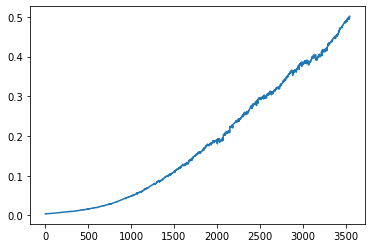

In [355]:
plt.plot(target_array)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


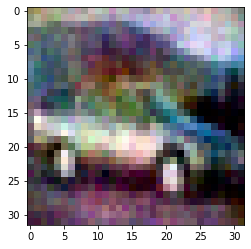

In [356]:
plt.imshow(x.reshape(32,32,-1).astype(int))